In [1]:
import json
import requests
import pprint
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#     INDUSTRIAL, RESIDENTIAL, COMMERCIAL, CO2 EMISSIONS

api_key = "xBHOp5xGbiJbfgLYjzQACZQdq9B4jJydxnj1HNPa"

# URL endpoint
url = f'https://api.eia.gov/v2/total-energy/data/?api_key={api_key}&frequency=monthly&data[0]=value&facets[msn][]=TXCCBUS&facets[msn][]=TXEIEUS&facets[msn][]=TXICBUS&facets[msn][]=TXRCBUS&start=2020-01&end=2023-01&sort[0][column]=period&sort[0][direction]=desc&offset=0&length=5000'
try:
    # Send the API request
    response = requests.get(url)
    response.raise_for_status()

    # Retrieve the data
    data = response.json()

    # Process the data as needed
    if "data" in data["response"]:
        # Extract the generator counts by location and energy source
        generator_counts = data["response"]["data"]
        pprint.pprint(data)
        
    else:
        print("No data available.")
except requests.exceptions.RequestException as e:
    print(f"Error: {e}")

{'apiVersion': '2.1.4',
 'request': {'command': '/v2/total-energy/data/',
             'params': {'api_key': 'xBHOp5xGbiJbfgLYjzQACZQdq9B4jJydxnj1HNPa',
                        'data': ['value'],
                        'end': '2023-01',
                        'facets': {'msn': ['TXCCBUS',
                                           'TXEIEUS',
                                           'TXICBUS',
                                           'TXRCBUS']},
                        'frequency': 'monthly',
                        'length': 5000,
                        'offset': 0,
                        'sort': [{'column': 'period', 'direction': 'desc'}],
                        'start': '2020-01'}},
 'response': {'data': [{'msn': 'TXCCBUS',
                        'period': '2023-01',
                        'seriesDescription': 'Total Primary Energy Consumed by '
                                             'the Commercial Sector in '
                                             'Trillion 

In [3]:
# Convert JSON file to Pandas Dataframe and confirm # of rows matches original file
data_df = pd.json_normalize(data["response"]["data"])
print("Rows in Dataframe: ", len(data_df))
data_df

Rows in Dataframe:  148


,period,msn,seriesDescription,value,unit
0,2023-01,TXCCBUS,Total Primary Energy Consumed by the Commercia...,621.593,Trillion Btu
1,2023-01,TXEIEUS,Total Energy Electric Power Sector CO2 Emissio...,117.289,Million Metric Tons of Carbon Dioxide
2,2023-01,TXICBUS,Total Primary Energy Consumed by the Industria...,1954.188,Trillion Btu
3,2023-01,TXRCBUS,Total Primary Energy Consumed by the Residenti...,1047.422,Trillion Btu
4,2022-12,TXICBUS,Total Primary Energy Consumed by the Industria...,1863.058,Trillion Btu
...,...,...,...,...,...
143,2020-02,TXICBUS,Total Primary Energy Consumed by the Industria...,1888.423,Trillion Btu
144,2020-01,TXCCBUS,Total Primary Energy Consumed by the Commercia...,627.259,Trillion Btu
145,2020-01,TXICBUS,Total Primary Energy Consumed by the Industria...,2013.471,Trillion Btu
146,2020-01,TXEIEUS,Total Energy Electric Power Sector CO2 Emissio...,120.822,Million Metric Tons of Carbon Dioxide


In [4]:
dataframes = {}

# Get unique values from the 'msn' column
unique_msn = data_df['msn'].unique()

# Split the data based on unique 'msn' values
for msn in unique_msn:
    dataframes[msn] = data_df[data_df['msn'] == msn].copy()

# Access the individual dataframes using the 'msn' as the key
df_txicbus = dataframes['TXICBUS']
df_txrcbus = dataframes['TXRCBUS']
df_txccbus = dataframes['TXCCBUS']
df_txeieus = dataframes['TXEIEUS']

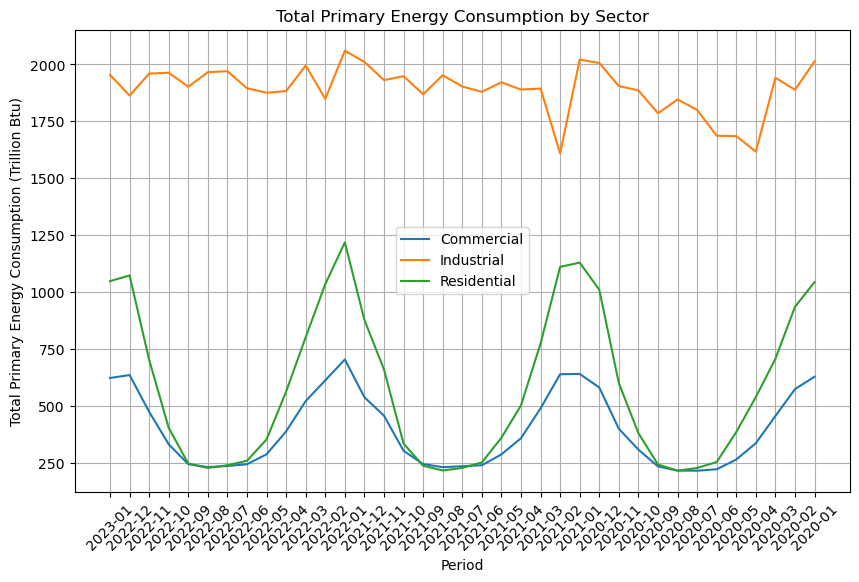

In [6]:

df = data_df
# Filter data for each category
commercial_data = df[df['msn'] == 'TXCCBUS']
industrial_data = df[df['msn'] == 'TXICBUS']
residential_data = df[df['msn'] == 'TXRCBUS']
co2_emissions_data = df[df['msn'] == 'TXEIEUS']

# Line plot of Total Primary Energy Consumption by Commercial, Industrial, and Residential sectors over time
plt.figure(figsize=(10, 6))
plt.plot(commercial_data['period'], commercial_data['value'], label='Commercial')
plt.plot(industrial_data['period'], industrial_data['value'], label='Industrial')
plt.plot(residential_data['period'], residential_data['value'], label='Residential')
plt.xlabel('Period')
plt.ylabel('Total Primary Energy Consumption (Trillion Btu)')
plt.title('Total Primary Energy Consumption by Sector')
plt.legend()
plt.xticks(rotation=90)
plt.grid(True)
plt.show()
plt.savefig('images/energy_consumption.png', dpi=300)

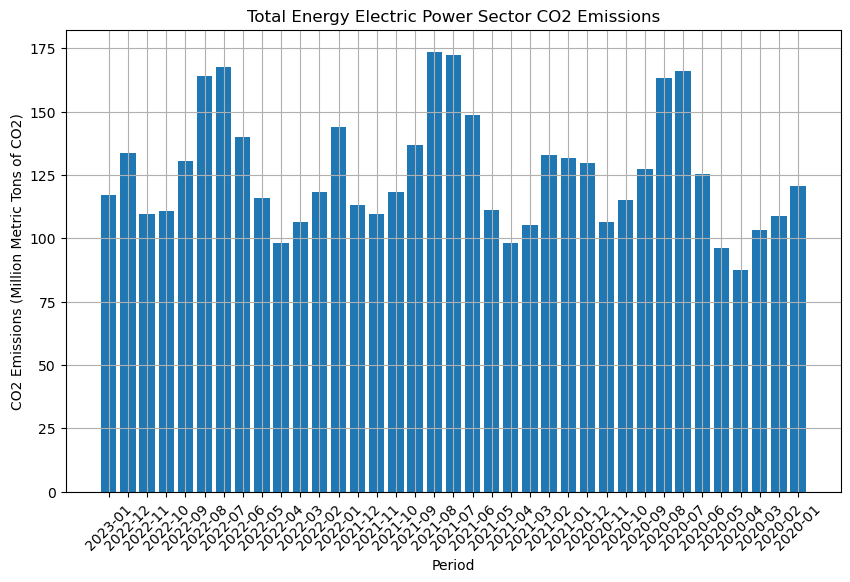

In [9]:
# Bar plot of Total Energy Electric Power Sector CO2 Emissions over time
plt.figure(figsize=(10, 6))
plt.bar(co2_emissions_data['period'], co2_emissions_data['value'])
plt.xlabel('Period')
plt.ylabel('CO2 Emissions (Million Metric Tons of CO2)')
plt.title('Total Energy Electric Power Sector CO2 Emissions')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

plt.savefig('images/co2_emissions.png', dpi=300)

In [16]:
# URL endpoint
url = f'https://api.eia.gov/v2/steo/data/?api_key={api_key}&frequency=monthly&data[0]=value&facets[seriesId][]=CLEPCNS_TX&facets[seriesId][]=CLEPGEN_TX&facets[seriesId][]=NGEPCNS_TX&facets[seriesId][]=NGEPGEN_TX&facets[seriesId][]=PAEPCNS_TX&facets[seriesId][]=PAEPGEN_TX&start=2020-01&end=2023-01&sort[0][column]=period&sort[0][direction]=desc&offset=0&length=5000'
try:
    # Send the API request
    response = requests.get(url)
    response.raise_for_status()

    # Retrieve the data
    data = response.json()

    # Process the data as needed
    if "data" in data["response"]:
        # Extract the generator counts by location and energy source
        generator_counts = data["response"]["data"]
        pprint.pprint(data)
        
    else:
        print("No data available.")
except requests.exceptions.RequestException as e:
    print(f"Error: {e}")


{'apiVersion': '2.1.4',
 'request': {'command': '/v2/steo/data/',
             'params': {'api_key': 'xBHOp5xGbiJbfgLYjzQACZQdq9B4jJydxnj1HNPa',
                        'data': ['value'],
                        'end': '2023-01',
                        'facets': {'seriesId': ['CLEPCNS_TX',
                                                'CLEPGEN_TX',
                                                'NGEPCNS_TX',
                                                'NGEPGEN_TX',
                                                'PAEPCNS_TX',
                                                'PAEPGEN_TX']},
                        'frequency': 'monthly',
                        'length': 5000,
                        'offset': 0,
                        'sort': [{'column': 'period', 'direction': 'desc'}],
                        'start': '2020-01'}},
 'response': {'data': [{'period': '2023-01',
                        'seriesDescription': 'Electric power sector  '
                                

In [17]:
# Convert JSON file to Pandas Dataframe and confirm # of rows matches original file
data_df = pd.json_normalize(data["response"]["data"])
print("Rows in Dataframe: ", len(data_df))
data_df

Rows in Dataframe:  222


,period,seriesId,seriesDescription,value,unit
0,2023-01,CLEPCNS_TX,"Electric power sector consumption of coal, Te...",2542.258000,thousand short tons
1,2023-01,PAEPGEN_TX,Electric power sector net generation from petr...,0.008990,billion kilowatthours
2,2023-01,CLEPGEN_TX,Electric power sector net generation from coal...,3.350762,billion kilowatthours
3,2023-01,NGEPGEN_TX,Electric power sector net generation from natu...,12.517534,billion kilowatthours
4,2023-01,NGEPCNS_TX,Electric power sector consumption of natural ...,103.396003,billion cubic feet
...,...,...,...,...,...
217,2020-01,CLEPGEN_TX,Electric power sector net generation from coal...,4.364575,billion kilowatthours
218,2020-01,PAEPGEN_TX,Electric power sector net generation from petr...,0.002527,billion kilowatthours
219,2020-01,NGEPGEN_TX,Electric power sector net generation from natu...,12.775476,billion kilowatthours
220,2020-01,PAEPCNS_TX,Electric power sector consumption of petroleu...,4.997000,thousand barrels


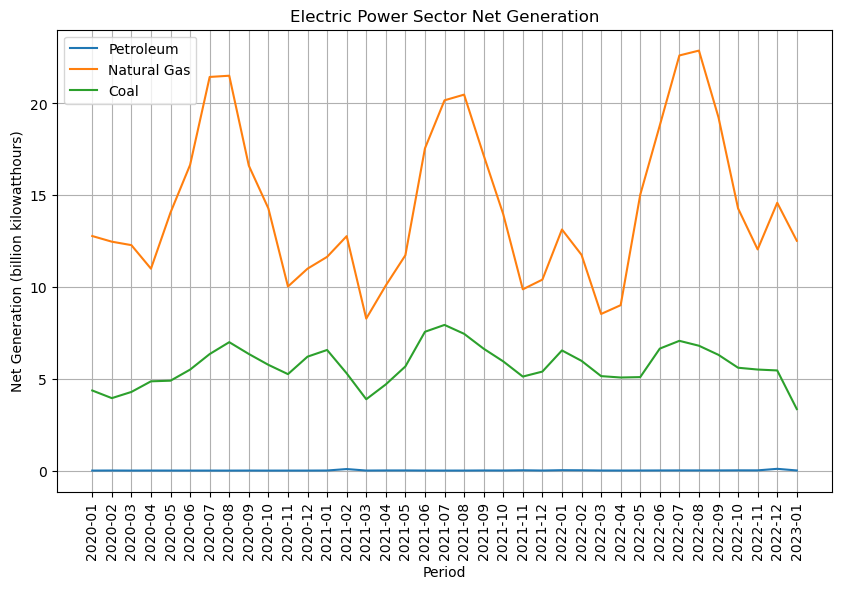

In [18]:
df = data_df
# Line plot of Electric Power Sector Net Generation from Petroleum, Natural Gas, and Coal
petroleum_generation = df[df['seriesId'] == 'PAEPGEN_TX']
natural_gas_generation = df[df['seriesId'] == 'NGEPGEN_TX']
coal_generation = df[df['seriesId'] == 'CLEPGEN_TX']
# Sort data by 'period' column in ascending order
petroleum_generation = petroleum_generation.sort_values('period')
natural_gas_generation = natural_gas_generation.sort_values('period')
coal_generation = coal_generation.sort_values('period')
plt.figure(figsize=(10, 6))
plt.plot(petroleum_generation['period'], petroleum_generation['value'], label='Petroleum')
plt.plot(natural_gas_generation['period'], natural_gas_generation['value'], label='Natural Gas')
plt.plot(coal_generation['period'], coal_generation['value'], label='Coal')
plt.xlabel('Period')
plt.ylabel('Net Generation (billion kilowatthours)')
plt.title('Electric Power Sector Net Generation')
plt.legend()
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

plt.savefig('images/net_generation.png', dpi=300)

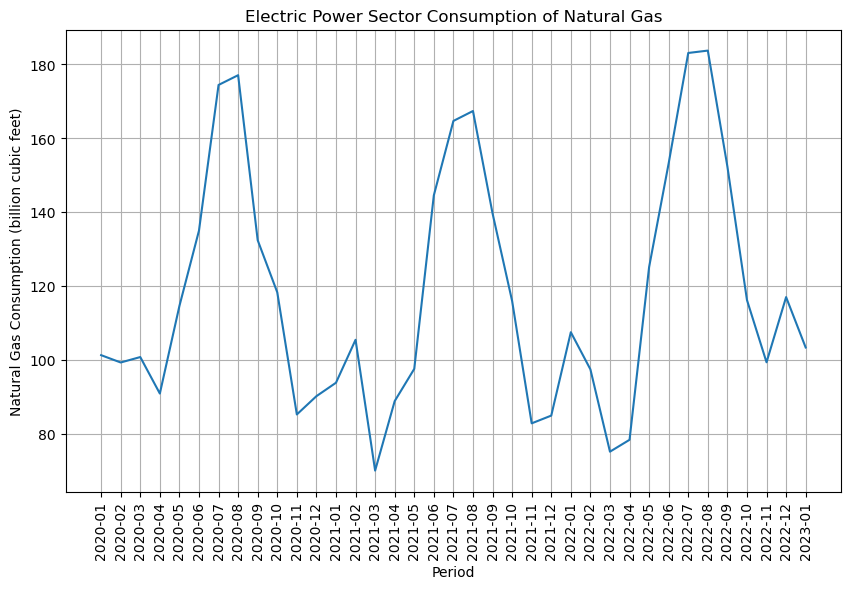

In [19]:
# Line plot of Electric Power Sector Consumption of Natural Gas
natural_gas_consumption = df[df['seriesId'] == 'NGEPCNS_TX']
natural_gas_consumption = natural_gas_consumption.sort_values('period')
plt.figure(figsize=(10, 6))
plt.plot(natural_gas_consumption['period'], natural_gas_consumption['value'])
plt.xlabel('Period')
plt.ylabel('Natural Gas Consumption (billion cubic feet)')
plt.title('Electric Power Sector Consumption of Natural Gas')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

plt.savefig('images/ng_consumption.png', dpi=300)

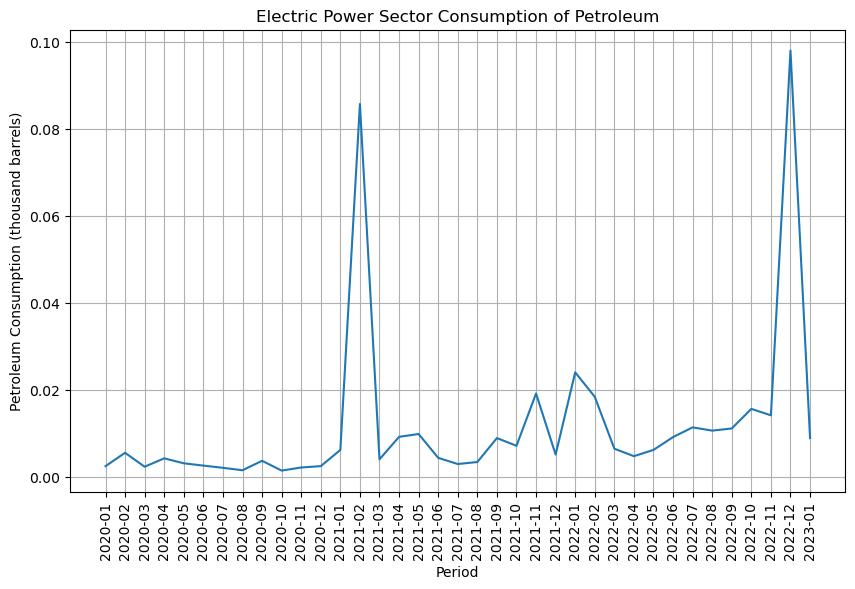

In [20]:
# Line plot of Electric Power Sector Consumption of Petroleum
petroleum_consumption = df[df['seriesId'] == 'PAEPGEN_TX']
petroleum_consumption = petroleum_consumption.sort_values('period')
plt.figure(figsize=(10, 6))
plt.plot(petroleum_consumption['period'], petroleum_consumption['value'])
plt.xlabel('Period')
plt.ylabel('Petroleum Consumption (thousand barrels)')
plt.title('Electric Power Sector Consumption of Petroleum')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

plt.savefig('images/p_consumption.png', dpi=300)

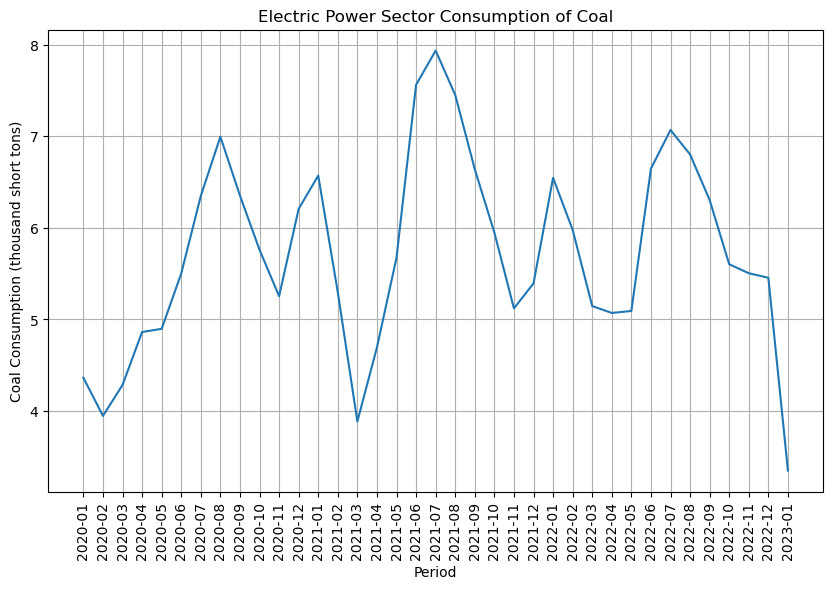

In [21]:
# Line plot of Electric Power Sector Consumption of Coal
coal_consumption = df[df['seriesId'] == 'CLEPGEN_TX']
coal_consumption = coal_consumption.sort_values('period')
plt.figure(figsize=(10, 6))
plt.plot(coal_consumption['period'], coal_consumption['value'])
plt.xlabel('Period')
plt.ylabel('Coal Consumption (thousand short tons)')
plt.title('Electric Power Sector Consumption of Coal')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

plt.savefig('images/c_consumption.png', dpi=300)